#Face Recognition

## Problem

##Imports

In [1]:
from os import listdir
from PIL import Image as PImage
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# drive.mount("/content/drive")
path = "/content/drive/MyDrive/Pattern Recognition/faces/"

##Download Dataset and Understand the Format

In [3]:
foldersList = listdir(path)
loadedImages = []
for folder in foldersList :
    imagesList = listdir(path+folder)
    for image in imagesList:
        img = PImage.open(path +folder+'/'+ image)
        loadedImages.append(img)

## Generate the Data Matrix and the Label Vector

In [4]:
# Reshape into matrix 40*10
images = np.array(loadedImages).reshape(-1,10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The input object of type 'PpmImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PpmImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [5]:
dataMatrixD = np.zeros(10304*400).reshape(-1,10304)
i=0
j=0
labels = np.zeros(400)
for image in loadedImages:
  dataMatrixD[i] = np.array(image).flatten()
  if(i%10 == 0):
    j = j+1
  labels[i] = j
  i = i + 1

In [6]:
print(loadedImages)

[<PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C416D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C1EED0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C27B10>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339BB1B90>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C41550>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C41350>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C41590>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339BB5BD0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339BB5E10>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339BB1790>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339BB5CD0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C411D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x

In [7]:
print(loadedImages[0])

<PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F1339C416D0>


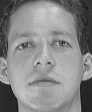

In [8]:
loadedImages[0]

In [9]:
print(dataMatrixD.shape)
print(labels.shape)

(400, 10304)
(400,)


In [10]:
print(dataMatrixD)

[[ 41.  47.  47. ...  35.  37.  38.]
 [ 48.  49.  45. ...  47.  46.  46.]
 [ 43.  50.  41. ... 158. 153. 169.]
 ...
 [157. 152. 154. ... 111. 108. 109.]
 [139. 143. 146. ...  83.  81.  74.]
 [155. 154. 154. ... 111. 111. 108.]]


## Split the Dataset into Training and Test sets

In [11]:
train_x = np.zeros(200*10304).reshape(-1,10304)
test_x = np.zeros(200*10304).reshape(-1,10304)
train_y = np.zeros(200)
test_y = np.zeros(200)

In [12]:
even=0
odd=0
for i in range(400):
  if i%2==0:
    test_x[even] = dataMatrixD[i]
    test_y[even] = labels[i]
    even += 1 
  else:
    train_x[odd] = dataMatrixD[i]
    train_y[odd] = labels[i]
    odd += 1

In [13]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(200, 10304)
(200,)
(200, 10304)
(200,)


## Classification using PCA

### Mean

In [14]:
# Compute Mean
mean = np.mean(train_x, axis=0)
print(mean)

[84.795 84.595 84.89  ... 77.01  75.69  75.115]


### Center Data

In [15]:
# Center Data
centeredData = train_x - mean
print(centeredData)

[[-36.795 -35.595 -39.89  ... -30.01  -29.69  -29.115]
 [-21.795 -31.595 -49.89  ... -36.01  -65.69  -51.115]
 [-24.795 -24.595 -22.89  ... -45.01  -41.69  -41.115]
 ...
 [ 68.205  67.405  67.11  ...  32.99   32.31   38.885]
 [ 72.205  67.405  69.11  ...  33.99   32.31   33.885]
 [ 70.205  69.405  69.11  ...  33.99   35.31   32.885]]


### Covariance Matrix

In [16]:
# Covariance
cov_matrix = np.cov(centeredData,rowvar=False, bias=True)
print(cov_matrix)

[[1321.332975 1306.101975 1302.98245  ... -181.11795  -129.63855
   -97.346425]
 [1306.101975 1308.060975 1296.69545  ... -182.50095  -127.61555
   -96.328425]
 [1302.98245  1296.69545  1301.2079   ... -160.3389   -103.9541
   -82.98735 ]
 ...
 [-181.11795  -182.50095  -160.3389   ... 2265.0299   2030.6281
  1874.48385 ]
 [-129.63855  -127.61555  -103.9541   ... 2030.6281   2061.5939
  1917.38065 ]
 [ -97.346425  -96.328425  -82.98735  ... 1874.48385  1917.38065
  2049.341775]]


### EigenValues & EigenVectors

In [17]:
# Compute EigenValues
eig_val, eig_vect = np.linalg.eig(cov_matrix)
print("Eigen Values:")
print(eig_val)
print("Eigen Vectors")
print(eig_vect)

Eigen Values:
[2.76060815e+06+0.00000000e+00j 2.12438539e+06+0.00000000e+00j
 1.06826515e+06+0.00000000e+00j ... 2.32002391e-13-9.94067286e-14j
 4.29897386e-13+0.00000000e+00j 2.16919667e-13+0.00000000e+00j]
Eigen Vectors
[[ 1.16284486e-03+0.00000000e+00j  1.61001750e-02+0.00000000e+00j
   2.07338869e-02+0.00000000e+00j ...  7.83192361e-04+4.16085728e-04j
   7.59471063e-04+0.00000000e+00j -7.80082649e-04+0.00000000e+00j]
 [ 1.40621779e-03+0.00000000e+00j  1.59143319e-02+0.00000000e+00j
   2.06020851e-02+0.00000000e+00j ... -7.13107205e-05+1.48005387e-05j
   7.56146330e-05+0.00000000e+00j  5.73831636e-05+0.00000000e+00j]
 [ 1.54039250e-03+0.00000000e+00j  1.59243537e-02+0.00000000e+00j
   2.05850751e-02+0.00000000e+00j ... -2.82814113e-05-8.11744545e-06j
   4.38510173e-05+0.00000000e+00j  3.71060565e-05+0.00000000e+00j]
 ...
 [ 7.63542279e-03+0.00000000e+00j -9.43565073e-03+0.00000000e+00j
   1.19757819e-02+0.00000000e+00j ...  3.48862097e-03-2.01158158e-03j
  -1.14887455e-02+0.00000000

### Eigen Matrix

In [18]:
eig_matrix = np.diag(eig_val)
print("Eigen Matrix:")
print(eig_matrix)

Eigen Matrix:
[[2.76060815e+06+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 2.12438539e+06+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  1.06826515e+06+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 ...
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 2.32002391e-13-9.94067286e-14j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  4.29897386e-13+0.00000000e+00j 0.00000000e+00+0.00000000e+0

In [19]:
# Compute EigenValues --> eigh guarantees sorting
eig_val2, eig_vect2 = np.linalg.eigh(cov_matrix)
print("Eigen Values:")
print(eig_val2)
print("Eigen Vectors")
print(eig_vect2)

Eigen Values:
[-1.70257618e-09 -1.65262808e-09 -1.29761939e-09 ...  1.06826515e+06
  2.12438539e+06  2.76060815e+06]
Eigen Vectors
[[ 0.         -0.         -0.         ...  0.02073389  0.01610018
  -0.00116284]
 [-0.47870129 -0.08783318  0.23825876 ...  0.02060209  0.01591433
  -0.00140622]
 [ 0.38500107 -0.59761855  0.05756969 ...  0.02058508  0.01592435
  -0.00154039]
 ...
 [ 0.01050324 -0.01359598  0.01173623 ...  0.01197578 -0.00943565
  -0.00763542]
 [ 0.00420562 -0.00343268 -0.01266879 ...  0.01143168 -0.00802537
  -0.00765999]
 [-0.01458627 -0.01154426  0.00430319 ...  0.01181597 -0.00754057
  -0.00814964]]


In [20]:
desc_eig_val = -np.sort(-eig_val)
print("Sorted EigenVlaues 1")
print(desc_eig_val)
desc_eig_val2 = np.flip(eig_val2, axis= 0)
desc_eig_vect2 = np.flip(eig_vect2, axis = 1)
print("Sorted EigenValues 2")
print(desc_eig_val2)
print("Sorted EigenVectors 2")
print(desc_eig_vect2)

Sorted EigenVlaues 1
[ 2.76060815e+06+0.00000000e+00j  2.12438539e+06+0.00000000e+00j
  1.06826515e+06+0.00000000e+00j ... -6.93856518e-11-1.09229552e-12j
 -9.93609197e-11+0.00000000e+00j -1.11386490e-10+0.00000000e+00j]
Sorted EigenValues 2
[ 2.76060815e+06  2.12438539e+06  1.06826515e+06 ... -1.29761939e-09
 -1.65262808e-09 -1.70257618e-09]
Sorted EigenVectors 2
[[-0.00116284  0.01610018  0.02073389 ... -0.         -0.
   0.        ]
 [-0.00140622  0.01591433  0.02060209 ...  0.23825876 -0.08783318
  -0.47870129]
 [-0.00154039  0.01592435  0.02058508 ...  0.05756969 -0.59761855
   0.38500107]
 ...
 [-0.00763542 -0.00943565  0.01197578 ...  0.01173623 -0.01359598
   0.01050324]
 [-0.00765999 -0.00802537  0.01143168 ... -0.01266879 -0.00343268
   0.00420562]
 [-0.00814964 -0.00754057  0.01181597 ...  0.00430319 -0.01154426
  -0.01458627]]


### Fraction of Total Variance

In [21]:
alpha = [0.8, 0.85, 0.9, 0.95]
dimensions = []
for a in alpha:
  dim = 0
  total = 0
  for eig in desc_eig_val2:
    total += eig
    dim += 1
    if (total/desc_eig_val2.sum())>a:
      dimensions.append(dim)
      break
print(dimensions)

[36, 51, 75, 115]


### Alpha aganist Dimensions

Text(0, 0.5, 'alpha')

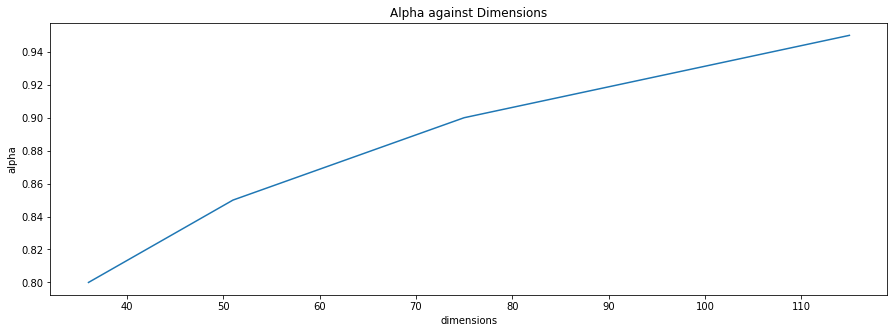

In [22]:
plt.figure(figsize=(15,5))
plt.plot(dimensions,alpha)
plt.title("Alpha against Dimensions")
plt.xlabel("dimensions")
plt.ylabel("alpha")

### Projection Matrix

In [23]:
projection_matrix_a1 = desc_eig_vect2[:,0:dimensions[0]]
projection_matrix_a2 = desc_eig_vect2[:,0:dimensions[1]]
projection_matrix_a3 = desc_eig_vect2[:,0:dimensions[2]]
projection_matrix_a4 = desc_eig_vect2[:,0:dimensions[3]]

In [24]:
dimensions[3]

115

In [25]:
projection_matrix_a1.shape

(10304, 36)

### Reduce Training Set

In [26]:
projected_matrix_a1 = np.dot(np.transpose(projection_matrix_a1),np.transpose(centeredData))
projected_matrix_a2 = np.dot(np.transpose(projection_matrix_a2),np.transpose(centeredData))
projected_matrix_a3 = np.dot(np.transpose(projection_matrix_a3),np.transpose(centeredData))
projected_matrix_a4 = np.dot(np.transpose(projection_matrix_a4),np.transpose(centeredData))

In [27]:
projected_matrix_a4.shape

(115, 200)

### Reduce Testing Set

In [28]:
mean_test = np.mean(test_x, axis=0)
centeredData_test = test_x - mean_test

In [29]:
projected_matrix_test_a1 = np.dot(np.transpose(projection_matrix_a1),np.transpose(centeredData_test))
projected_matrix_test_a2 = np.dot(np.transpose(projection_matrix_a2),np.transpose(centeredData_test))
projected_matrix_test_a3 = np.dot(np.transpose(projection_matrix_a3),np.transpose(centeredData_test))
projected_matrix_test_a4 = np.dot(np.transpose(projection_matrix_a4),np.transpose(centeredData_test))

### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [31]:
def knn(train_x_in, train_y_in, test_x_in, test_y_in, k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_x_in,train_y_in)
  pred_y=knn.predict(test_x_in)
  accuracy=accuracy_score(test_y_in, pred_y) * 100
  return accuracy


In [32]:
kk = [1, 3, 5, 7]
accuracies = []
accuracy = []
# accuracy_a1 = []
# accuracy_a2 = []
# accuracy_a3 = []
# accuracy_a4 = []

for k in kk:
  accuracy.append(knn(np.transpose(projected_matrix_a1), train_y, np.transpose(projected_matrix_test_a1),test_y, k))
  accuracy.append(knn(np.transpose(projected_matrix_a2), train_y, np.transpose(projected_matrix_test_a2),test_y, k))
  accuracy.append(knn(np.transpose(projected_matrix_a3), train_y, np.transpose(projected_matrix_test_a3),test_y, k))
  accuracy.append(knn(np.transpose(projected_matrix_a4), train_y, np.transpose(projected_matrix_test_a4),test_y, k))
  accuracies.append(accuracy)
  accuracy = []

In [33]:
print(accuracy_a1)
print(accuracy_a2)
print(accuracy_a3)
print(accuracy_a4)

NameError: ignored

In [34]:
print(accuracies)

[[96.0, 96.0, 96.0, 95.5], [84.5, 86.0, 85.0, 85.0], [79.5, 78.0, 80.0, 80.0], [75.5, 75.5, 76.5, 76.5]]


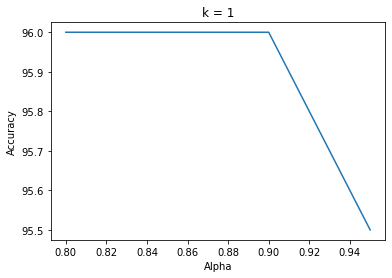

Accuracy at k=1, dim=36, alpha=0.8 = 96.0 %
Accuracy at k=1, dim=51, alpha=0.85 = 96.0 %
Accuracy at k=1, dim=75, alpha=0.9 = 96.0 %
Accuracy at k=1, dim=115, alpha=0.95 = 95.5 %
---------------------------------------------------------------


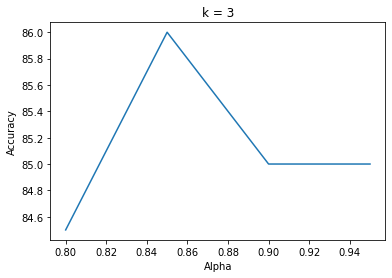

Accuracy at k=3, dim=36, alpha=0.8 = 84.5 %
Accuracy at k=3, dim=51, alpha=0.85 = 86.0 %
Accuracy at k=3, dim=75, alpha=0.9 = 85.0 %
Accuracy at k=3, dim=115, alpha=0.95 = 85.0 %
---------------------------------------------------------------


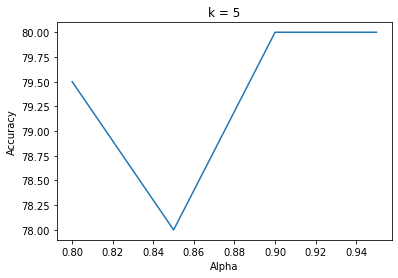

Accuracy at k=5, dim=36, alpha=0.8 = 79.5 %
Accuracy at k=5, dim=51, alpha=0.85 = 78.0 %
Accuracy at k=5, dim=75, alpha=0.9 = 80.0 %
Accuracy at k=5, dim=115, alpha=0.95 = 80.0 %
---------------------------------------------------------------


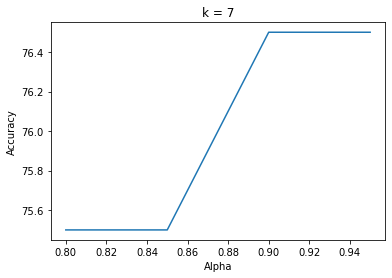

Accuracy at k=7, dim=36, alpha=0.8 = 75.5 %
Accuracy at k=7, dim=51, alpha=0.85 = 75.5 %
Accuracy at k=7, dim=75, alpha=0.9 = 76.5 %
Accuracy at k=7, dim=115, alpha=0.95 = 76.5 %
---------------------------------------------------------------


In [35]:
# Plot Alpha against Accuracy at Constant K
for i in range(len(accuracies[0])): 
  plt.title(f'k = {kk[i]}')
  plt.plot(alpha,accuracies[i])
  plt.xlabel('Alpha')
  plt.ylabel('Accuracy')
  plt.show()
  for j in range(len(accuracies[0])):
    print(f'Accuracy at k={kk[i]}, dim={dimensions[j]}, alpha={alpha[j]} = {accuracies[i][j]} %')
  print('---------------------------------------------------------------')

In [36]:
[i[0] for i in accuracies]

[96.0, 84.5, 79.5, 75.5]

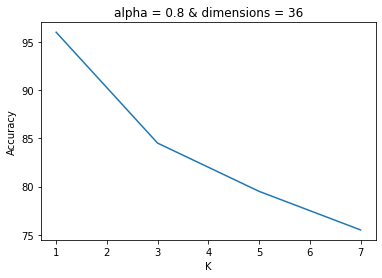

Accuracy at k=1, dim=36, alpha=0.8 = 96.0 %
Accuracy at k=3, dim=36, alpha=0.8 = 84.5 %
Accuracy at k=5, dim=36, alpha=0.8 = 79.5 %
Accuracy at k=7, dim=36, alpha=0.8 = 75.5 %
---------------------------------------------------------------


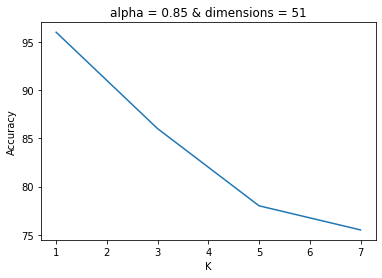

Accuracy at k=1, dim=51, alpha=0.85 = 96.0 %
Accuracy at k=3, dim=51, alpha=0.85 = 86.0 %
Accuracy at k=5, dim=51, alpha=0.85 = 78.0 %
Accuracy at k=7, dim=51, alpha=0.85 = 75.5 %
---------------------------------------------------------------


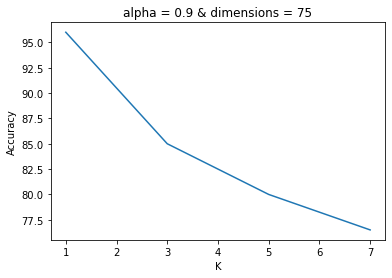

Accuracy at k=1, dim=75, alpha=0.9 = 96.0 %
Accuracy at k=3, dim=75, alpha=0.9 = 85.0 %
Accuracy at k=5, dim=75, alpha=0.9 = 80.0 %
Accuracy at k=7, dim=75, alpha=0.9 = 76.5 %
---------------------------------------------------------------


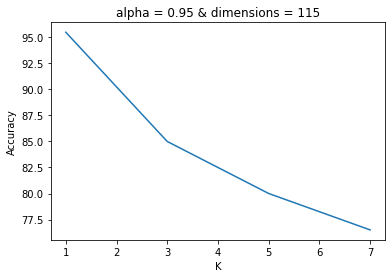

Accuracy at k=1, dim=115, alpha=0.95 = 95.5 %
Accuracy at k=3, dim=115, alpha=0.95 = 85.0 %
Accuracy at k=5, dim=115, alpha=0.95 = 80.0 %
Accuracy at k=7, dim=115, alpha=0.95 = 76.5 %
---------------------------------------------------------------


In [37]:
# Plot K against Accuracy at contant Alpha & Dimensions
for i in range(len(kk)): 
  plt.title(f'alpha = {alpha[i]} & dimensions = {dimensions[i]}')
  plt.plot(kk,[j[i] for j in accuracies])
  plt.xlabel('K')
  plt.ylabel('Accuracy')
  plt.show()
  for j in range(len(kk)):
    print(f'Accuracy at k={kk[j]}, dim={dimensions[i]}, alpha={alpha[i]} = {accuracies[j][i]} %')
  print('---------------------------------------------------------------')

Conclusion. Principal Component Analysis (PCA) is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model

However, Using PCA can lose some spatial information which is important for classification, so the classification accuracy decreases.

PCA can help us improve performance at a very low cost of model accuracy. Other benefits of PCA include reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data.

## Classification Using LDA

### Mean

In [38]:
mean_vect = np.zeros(40*10304).reshape(-1,10304)
# for i in range(200):
#   mean_vect[i] = np.mean(train_x[i], axis = 0)
i = 0
for j in range(0,200,5):
  mean_vect[i] = np.mean(train_x[j:j+5],axis=0)
  i += 1
print(mean_vect.shape)
print(mean_vect)

(40, 10304)
[[ 51.4  49.2  43.6 ...  41.   35.2  36.4]
 [120.8 120.6 121.4 ...  77.4  77.8  76.4]
 [ 52.8  56.8  57.6 ...  40.4  44.4  43.2]
 ...
 [127.4 122.6 125.6 ...  56.6  58.8  59.4]
 [ 84.4  85.   83.8 ... 122.6 122.6 118.8]
 [153.2 151.2 151.8 ... 102.6 103.  103.8]]


In [39]:
mean_overall = np.mean(train_x,axis=0)
print(mean_overall.shape)
print(mean_overall)

(10304,)
[84.795 84.595 84.89  ... 77.01  75.69  75.115]


### Sb

In [40]:
Sb = 0
Nk = 5
for i in range(40):
  Sb += Nk*np.dot(np.transpose(np.matrix(mean_vect[i]-mean_overall)),np.matrix((mean_vect[i]-mean_overall)))

In [48]:
print(Sb.shape)
print(Sb)

(10304, 10304)
[[234863.795 232573.795 232094.49  ... -35854.79  -27192.11  -20100.685]
 [232573.795 231050.195 230231.29  ... -34881.39  -27013.71  -19881.885]
 [232094.49  230231.29  230174.38  ... -32170.98  -23273.22  -16339.47 ]
 ...
 [-35854.79  -34881.39  -32170.98  ... 336561.98  324371.42  319641.57 ]
 [-27192.11  -27013.71  -23273.22  ... 324371.42  320927.58  317650.73 ]
 [-20100.685 -19881.885 -16339.47  ... 319641.57  317650.73  319537.955]]


### Center Data

In [42]:
Zs = np.zeros(200*10304).reshape(-1,10304)
j = 0
for i in range(200):
  Zs[i] = train_x[i] - mean_vect[j]
  if i%5==0 and i!=0:
    j += 1

In [43]:
print(Zs.shape)
print(Zs)

(200, 10304)
[[ -3.4  -0.2   1.4 ...   6.   10.8   9.6]
 [ 11.6   3.8  -8.6 ...   0.  -25.2 -12.4]
 [  8.6  10.8  18.4 ...  -9.   -1.2  -2.4]
 ...
 [ -0.2   0.8   0.2 ...   7.4   5.   10.2]
 [  3.8   0.8   2.2 ...   8.4   5.    5.2]
 [  1.8   2.8   2.2 ...   8.4   8.    4.2]]


### S

In [44]:
Ss = np.zeros(10304*10304).reshape(10304,10304)
j = 0
for i in range(0,200,5):
  Ss += np.dot(np.transpose(Zs[i:i+5,:]),Zs[i:i+5,:])
  j += 1

In [45]:
print(Ss.shape)
print(Ss)

(10304, 10304)
[[110440.92 110371.64 108738.88 ... -21613.52 -14737.52 -12395.6 ]
 [110371.64 113363.6  110206.36 ... -25231.12 -17333.36 -14958.68]
 [108738.88 110206.36 109752.92 ... -20855.48 -13497.28 -13602.2 ]
 ...
 [-21613.52 -25231.12 -20855.48 ... 239200.64 199249.4  162036.52]
 [-14737.52 -17333.36 -13497.28 ... 199249.4  209341.24 175559.88]
 [-12395.6  -14958.68 -13602.2  ... 162036.52 175559.88 193834.52]]


### EigenValues & EigenVectors

In [46]:
eig_val_LDA, eig_vect_LDA = np.linalg.eigh(np.dot(np.linalg.pinv(Ss),Sb)) 

In [52]:
print(eig_val_LDA.shape)
print(eig_vect_LDA.shape)
print(eig_val_LDA)
print(eig_vect_LDA)

(10304,)
(10304, 10304)
[-8788.52397894 -1979.54997123 -1902.98948367 ...  2340.60321565
  3028.81723472 11834.24781989]
[[-0.01144939 -0.00547927  0.01682328 ... -0.00212797  0.02061376
  -0.01214962]
 [-0.01110326 -0.00528725  0.0162158  ... -0.00210292  0.02011337
  -0.01181519]
 [-0.01160026 -0.0050093   0.01638684 ... -0.0024122   0.02010082
  -0.01229229]
 ...
 [ 0.01689688  0.01605231  0.02217022 ...  0.02026882 -0.01204128
  -0.01832099]
 [ 0.01934799  0.01636692  0.0279037  ...  0.0236665  -0.01647265
  -0.02110408]
 [ 0.01310836  0.00776997  0.022066   ...  0.01449242 -0.01567316
  -0.01417878]]


In [49]:
np.savetxt('eig_val_LDA.csv', eig_val, delimiter=',')

In [50]:
np.savetxt('eig_vect_LDA.csv', eig_vect, delimiter=',')

In [51]:
%cp -av "/content/eig_val_LDA.csv" "/content/drive/MyDrive/Pattern Recognition"
%cp -av "/content/eig_vect_LDA.csv" "/content/drive/MyDrive/Pattern Recognition"

'/content/eig_val_LDA.csv' -> '/content/drive/MyDrive/Pattern Recognition/eig_val_LDA.csv'
'/content/eig_vect_LDA.csv' -> '/content/drive/MyDrive/Pattern Recognition/eig_vect_LDA.csv'


In [53]:
projection_matrix_LDA = eig_vect_LDA[:, :39]

### Reduce Training Set

In [54]:
projected_train_x = np.dot(np.transpose(projection_matrix_LDA),np.transpose(centeredData))

### Reduce Testing Set

In [55]:
projected_test_x = np.dot(np.transpose(projection_matrix_LDA),np.transpose(centeredData_test))

### KNN

In [62]:
accuracy = []

for k in kk:
  accuracy.append(knn(np.transpose(projected_train_x), train_y, np.transpose(projected_test_x),test_y, k))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [64]:
print(accuracy)

[90.5, 84.5, 81.0, 75.5]


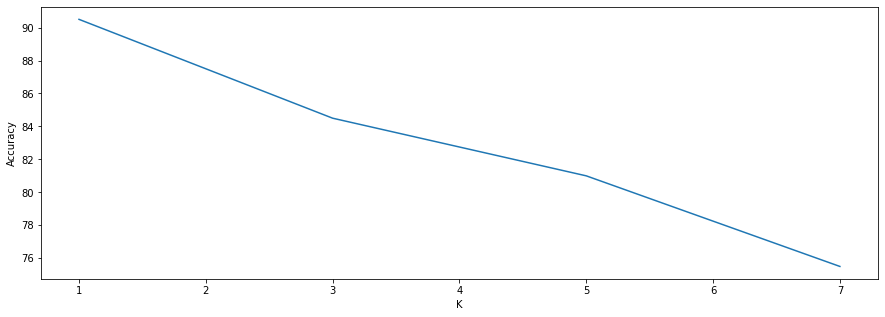

Accuracy at k=1 = 90.5 %
Accuracy at k=3 = 84.5 %
Accuracy at k=5 = 81.0 %
Accuracy at k=7 = 75.5 %
---------------------------------------------------------------


In [71]:
# Plot K against Accuracy 
plt.figure(figsize=(15,5))
plt.plot(kk,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
for j in range(len(kk)):
  print(f'Accuracy at k={kk[j]} = {accuracy[j]} %')
print('---------------------------------------------------------------')

## Compare Non-Face Images